In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "C:\\Users\\HP\\Documents\\ML\\Decision Tree\\Titanic Survival\\titanic.csv"
data = pd.read_csv(file_path)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']

In [5]:
X['Age'].fillna(int(X['Age'].mean()), inplace=True)
X.head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_17772\2948049733.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(int(X['Age'].mean()), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17772\2948049733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(int(X['Age'].mean()), inplace=True)


,Pclass,Sex,Age,Fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
5,3,male,29.699118,8.4583
6,1,male,54.000000,51.8625
7,3,male,2.000000,21.0750
8,3,female,27.000000,11.1333
9,2,female,14.000000,30.0708


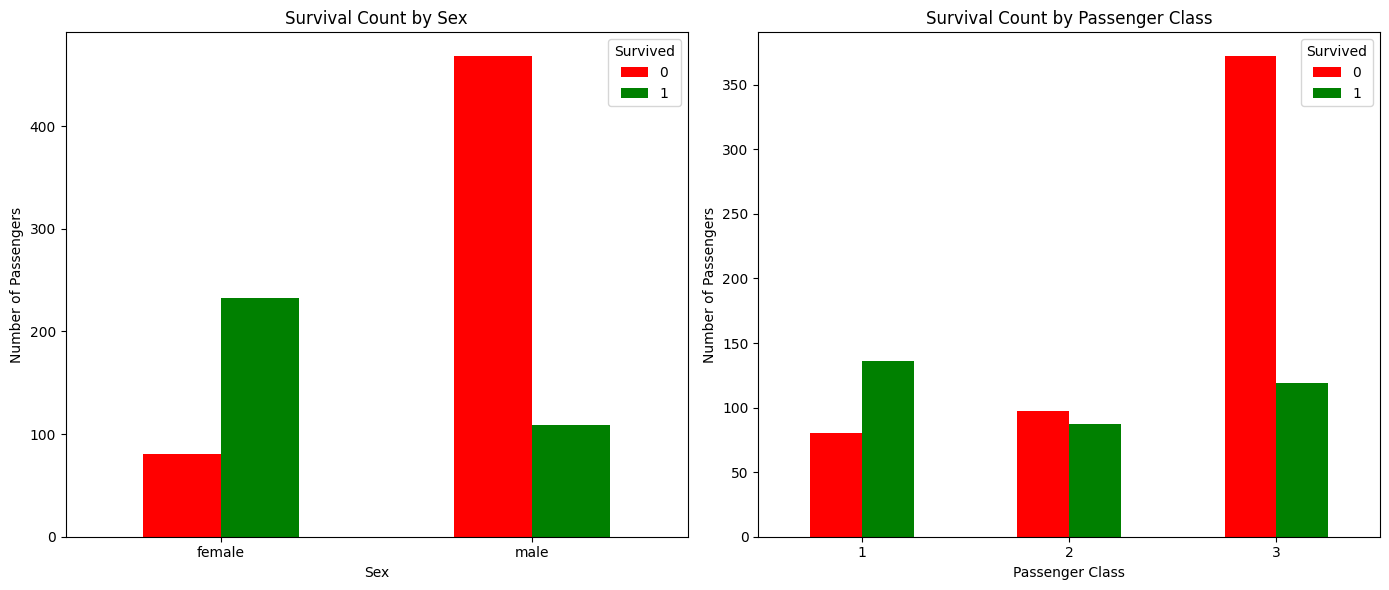

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

grouped_data = data.groupby('Sex')['Survived'].value_counts().unstack()
grouped_data.plot(kind='bar', stacked=False, color=['red', 'green'], ax=axs[0])
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('Number of Passengers')
axs[0].set_title('Survival Count by Sex')
axs[0].tick_params(axis='x', rotation=0) 

grouped_data_2 = data.groupby('Pclass')['Survived'].value_counts().unstack()
grouped_data_2.plot(kind='bar', stacked=False, color=['red', 'green'], ax=axs[1])
axs[1].set_xlabel('Passenger Class')
axs[1].set_ylabel('Number of Passengers')
axs[1].set_title('Survival Count by Passenger Class')
axs[1].tick_params(axis='x', rotation=0) 

plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Sex_n'] = le.fit_transform(X['Sex'])
X = X.drop(['Sex'], axis='columns')
X.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_17772\1417375121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex_n'] = le.fit_transform(X['Sex'])


,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
y_pred = model.predict(X_test)

In [21]:
model.score(X_test, y_test)

0.7932960893854749

In [26]:
X_test['Sex'] = le.inverse_transform(X_test['Sex_n'])
X_test = X_test.drop(['Sex_n'], axis='columns')
X_test.head()

,Pclass,Age,Fare,Sex
270,1,29.699118,31.0000,male
43,2,3.000000,41.5792,female
217,2,42.000000,27.0000,male
378,3,20.000000,4.0125,male
659,1,58.000000,113.2750,male


In [27]:
X_test['Survived'] = pd.DataFrame(y_test)
X_test.head()

,Pclass,Age,Fare,Sex,Survived
270,1,29.699118,31.0000,male,0
43,2,3.000000,41.5792,female,1
217,2,42.000000,27.0000,male,0
378,3,20.000000,4.0125,male,0
659,1,58.000000,113.2750,male,0


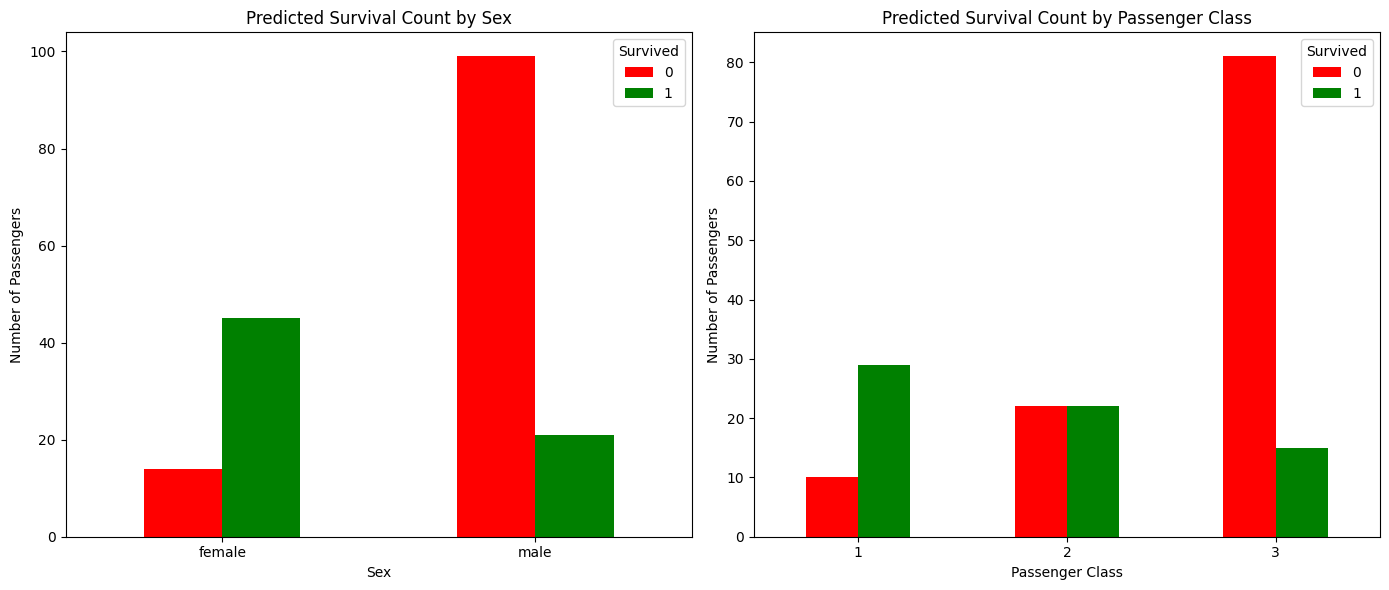

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

pgrouped_data = X_test.groupby('Sex')['Survived'].value_counts().unstack()
pgrouped_data.plot(kind='bar', stacked=False, color=['red', 'green'], ax=axs[0])
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('Number of Passengers')
axs[0].set_title('Predicted Survival Count by Sex')
axs[0].tick_params(axis='x', rotation=0) 

pgrouped_data_2 = X_test.groupby('Pclass')['Survived'].value_counts().unstack()
pgrouped_data_2.plot(kind='bar', stacked=False, color=['red', 'green'], ax=axs[1])
axs[1].set_xlabel('Passenger Class')
axs[1].set_ylabel('Number of Passengers')
axs[1].set_title('Predicted Survival Count by Passenger Class')
axs[1].tick_params(axis='x', rotation=0) 

plt.tight_layout()
plt.show()